# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |   |
| **Fecha**      |   |
| **Expediente** |   |

## Regresión polinomial

Observa la siguiente gráfica.

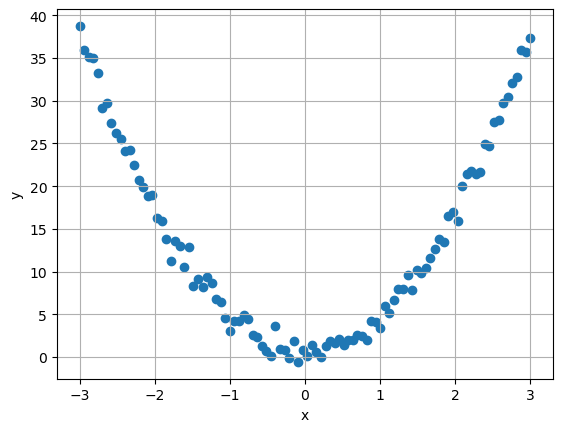

In [35]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [38]:
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4 * x**2 + np.random.normal(0, 1, 100)

X = x[:, np.newaxis]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(model.coef_[0])
print(model.intercept_)

-0.0495544774359067
13.30223225795873


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

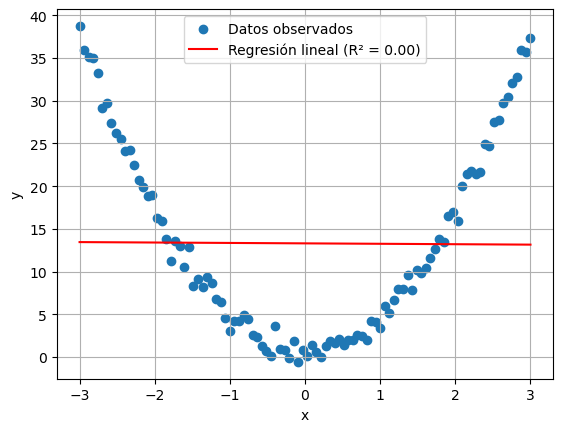

In [43]:
from sklearn.metrics import r2_score 
r2 = r2_score(y, y_pred)

plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x, y, label="Datos observados")
plt.plot(x, y_pred, color='red', label=f"Regresión lineal (R² = {r2:.2f})")
plt.legend()
plt.grid()
plt.show()

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [49]:
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4 * x**2 + np.random.normal(0, 1, 100)

X = x[:, np.newaxis]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

r2 = r2_score(y, y_pred)


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

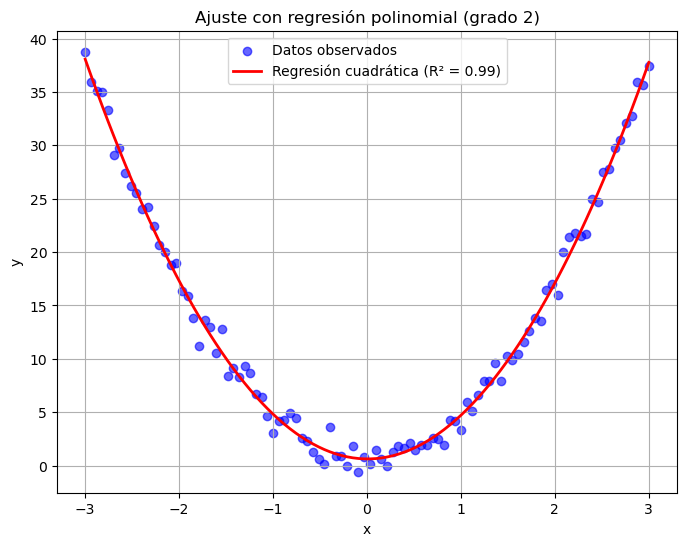

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="Datos observados", color='blue', alpha=0.6)
plt.plot(x, y_pred, color='red', linewidth=2, label=f"Regresión cuadrática (R² = {r2:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste con regresión polinomial (grado 2)")
plt.legend()
plt.grid(True)
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [75]:
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4 * x**2 + np.random.normal(0, 1, 100)

degrees = [3, 5, 7, 9, 11]

In [77]:
r2_scores = {}
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    r2_scores[degree] = r2

print("Coeficientes de determinación (R²):")
for degree, r2 in r2_scores.items():
    print(f"Grado {degree}: {r2:.4f}")

Coeficientes de determinación (R²):
Grado 3: 0.9934
Grado 5: 0.9935
Grado 7: 0.9935
Grado 9: 0.9935
Grado 11: 0.9935


Crea una gráfica por cada modelo con las observaciones y su curva.

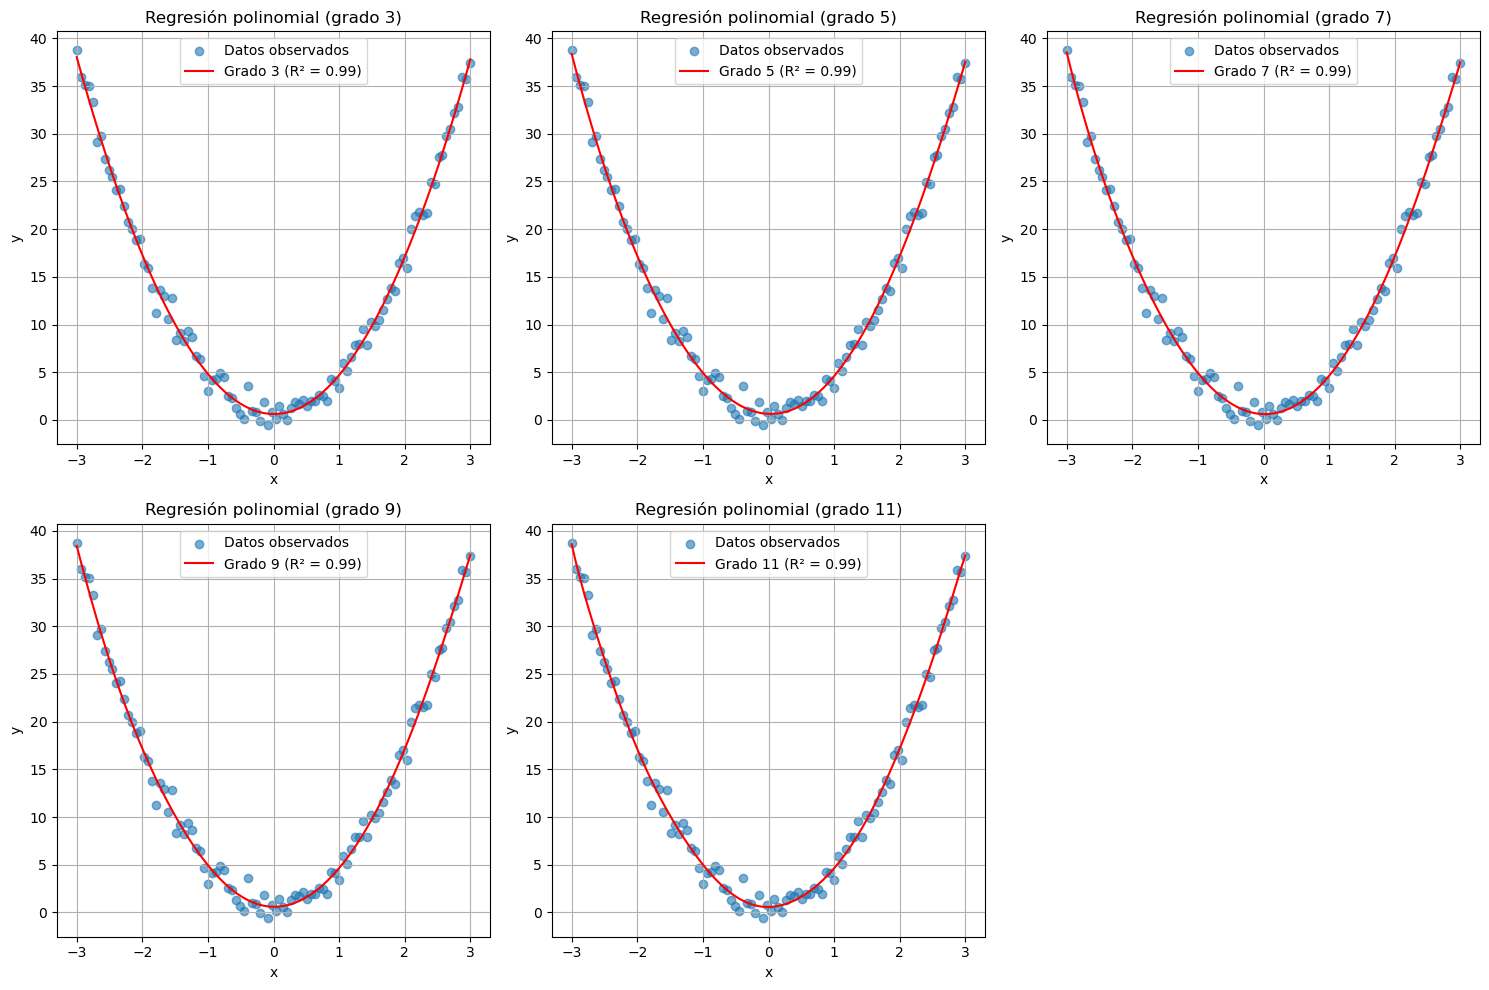

In [80]:
plt.figure(figsize=(15, 10))
for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x[:, np.newaxis])

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    r2 = r2_score(y, y_pred)
    
    plt.subplot(2, 3, i + 1)
    plt.scatter(x, y, label="Datos observados", alpha=0.6)
    plt.plot(x, y_pred, color='red', label=f"Grado {degree} (R² = {r2:.2f})")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"Regresión polinomial (grado {degree})")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El mejor es el modelo 3. Aunque los modelos de grados mayores (5, 7, 9, 11) tienen un $R^2$ 2
  ligeramente más alto, la mejora es mí Por lo que evitamos complejidad innecesarianima.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [88]:
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4 * x**2 + np.random.normal(0, 1, 100)

degrees = [2, 3, 5, 7, 9, 11]

x_new = 5

predictions = {}
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    
    model = LinearRegression()
    model.fit(X_poly, y)
    
    X_new_poly = poly.transform(np.array([[x_new]]))
    y_pred = model.predict(X_new_poly)
    predictions[degree] = y_pred[0]

print("Predicciones para x = 5:")
for degree, y_pred in predictions.items():
    print(f"Grado {degree}: {y_pred:.4f}")

Predicciones para x = 5:
Grado 2: 103.9689
Grado 3: 104.2523
Grado 5: 84.5990
Grado 7: 33.7432
Grado 9: 215.7364
Grado 11: -5265.3443


¿Cuál modelo crees que sea mejor?

El modelo de grado 2 es el mejor porque predice valores razonables y estables al extrapolar, sin sobreajustar los datos como lo hacen los modelos de grados más altos.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3